In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline 
import seaborn as sn


In [2]:
df = pd.read_csv("FuelConsumptionCo2.csv")

In [3]:
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

[]

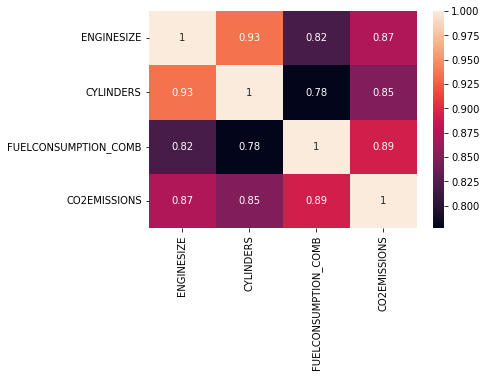

In [6]:
cdf = df[[ 'ENGINESIZE', 'CYLINDERS','TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
corr = cdf.corr()

sn.heatmap(corr,annot = True)
pl.plot()
#heatmap shows the corelation between CO2 emmision & fuelConsumption_COMB

In [7]:
#creating train & test dataset
split = np.random.rand(len(cdf))<0.8
train = cdf[split]
test = cdf[~split]


Text(0, 0.5, 'CO2 emissions')

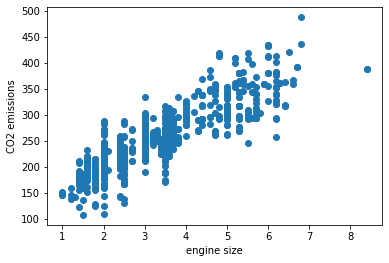

In [8]:
#viewing the training data distribution using scatter plot
#engine size & CO2 emissions

pl.scatter(train['ENGINESIZE'],train['CO2EMISSIONS'])
pl.xlabel('engine size')
pl.ylabel('CO2 emissions')
# you can see the linear line plot which describes the relation between the 2 variables 

Text(0, 0.5, 'CO2 emissions')

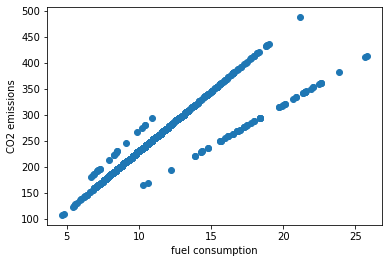

In [9]:
#engine size & CO2 emissions

pl.scatter(train['FUELCONSUMPTION_COMB'],train['CO2EMISSIONS'])
pl.xlabel('fuel consumption')
pl.ylabel('CO2 emissions')

#this plot shows a not-so linear relation between the two variables (fuel consumption & CO2 emissions)

In [10]:
# lets do some modeling :P 
#LINEAR MODEL 

from sklearn import linear_model

SAmodel = linear_model.LinearRegression()
train_x = train[['ENGINESIZE']]
train_y = train[['CO2EMISSIONS']]
SAmodel.fit(train_x,train_y)

print("coefficient is ",SAmodel.coef_)
print("intercept is ",SAmodel.intercept_)




coefficient is  [[38.96546181]]
intercept is  [125.19275477]


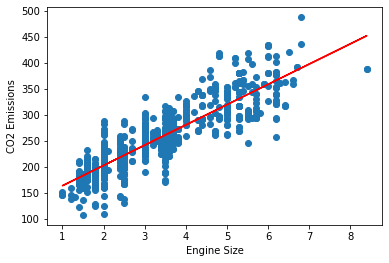

In [11]:
# plotting line in the graph
# y = mx + C
# m is the .coef_ and C is the .intercept
pl.plot(train_x,(SAmodel.coef_ * train_x ) + SAmodel.intercept_,'r')
pl.scatter(train['ENGINESIZE'],train['CO2EMISSIONS'])
pl.xlabel("Engine Size")
pl.ylabel("CO2 Emissions")
pl.show()


In [15]:
#Predict Predict PREDICT !!!
test_x = test[['ENGINESIZE']]
test_y = test[['CO2EMISSIONS']]

predictedCO2 = SAmodel.predict(test_x)

# Evaluate 

# mean absolute error
mae = np.mean(np.absolute(test_y-predictedCO2))
print("mean absolute error", mae)

# mean squared error

mse = np.mean(( test_y-predictedCO2)**2)
print("mean squared error", mse)

from sklearn.metrics import r2_score
# R2 score
print("r2 score ",r2_score(predictedCO2,test_y))


mean absolute error CO2EMISSIONS    23.492568
dtype: float64
mean squared error CO2EMISSIONS    986.972123
dtype: float64
r2 score  0.6863442426651477


In [13]:
#MAE
# consider a MAE value of ~24 , it means that predicted value is +/- 24 around the actual value

#MSE
# There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect(note : highly affected by outliers)

In [23]:
predvalue = SAmodel.predict(np.array([[5],[9]]))
print("for a engine size of 5, the CO2 emission will be ", predvalue)

for a engine size of 5, the CO2 emission will be  [[320.02006381]
 [475.88191104]]


C:\Users\sandy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
